<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/02_AlgebraLineal/05_Espacios_Vectoriales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Espacios Vectoriales
## Proyecto PAPIME PE101019
- Autor: Ortega Ibarra Jaime
- Rev: 25 Junio 2020

**¿Alguna vez has visitado un Billar?**

Dentro de este juego, se debe golpear una bola con cierta fuerza y dirección, de tal manera que pueda trazar una ruta hacía otra bola con el objetivo de introducirla dentro de alguna tronera (Esquina de la mesa), pero ¿Qué es esto?, pues esto al tener más de un vector, cada uno con cierta dirección y sentido, pueden verse como un espacio vectorial.

### Introducción 
En álgebra abstracta, un espacio vectorial es una estructura algebraica creada a partir de un conjunto no vacío, una operación interna (llamada suma, definida para los elementos del conjunto) y una operación externa (llamada producto por un escalar, definida entre dicho conjunto y otro conjunto, con estructura de cuerpo), con 8 propiedades fundamentales. A los elementos de un espacio vectorial se les llama vectores y a los elementos del cuerpo, escalares.

- Un espacio vectorial sobre un cuerpo  $K$ (como el cuerpo de los números reales o los números complejos) es un conjunto $V$  no vacío, dotado de dos operaciones para las cuales será cerrado:
\begin{equation}
Suma : VxV \rightarrow V
\end{equation}
\begin{equation}
(u,v) \rightarrow w=u+v
\end{equation}
Operación interna tal que contenga las siguientes propiedades:
  - Propiedad Conmutativa:
\begin{equation}
u+v = v+u,  
\end{equation}
\begin{equation}
\forall n,v \in V
\end{equation}
  - Propiedad Asociativa:
\begin{equation}
u+(u+w)=(u+v)+w, 
\end{equation}
\begin{equation}
\forall n,v,w \in V
\end{equation}
  - Exista el elemento neutro:
\begin{equation}
\exists e \in V:u+e=u,
\end{equation}
\begin{equation}
\forall u \in V
\end{equation}
  - Exista el elemento opuesto:
\begin{equation}
\forall u \in V, \exists -u \in V:u+(-u)=e
\end{equation}
Y tenga la operación productio por un escalar:
\begin{equation}
Proudcto: KxV \rightarrow V
\end{equation}
\begin{equation}
(a,u) \rightarrow v=a \cdot u
\end{equation}
operación externa tal que:
  - Tenga la propiedad Asociativa:
\begin{equation}
a \cdot (b \cdot u) = (a \cdot b) \cdot u
\end{equation}
\begin{equation}
\forall a,b \in K, \forall u \in V
\end{equation}
  - Exista el elemento neutro:
\begin{equation}
 \exists e \in K:e \cdot u = u,
\end{equation}
\begin{equation}
\forall u \in V
\end{equation}
  - Tenga la propiedad distributiva respecto de la suma vectorial:
\begin{equation}
a \cdot (u+v) = a \cdot u + a \cdot v,
\end{equation}
\begin{equation}
\forall a \in K, \forall u,v \in V
\end{equation}
  - Tenga la propiedad distributiva respecto de la suma escalar:
\begin{equation}
(a+b) \cdot u = a \cdot u + b \cdot u,
\end{equation}
\begin{equation}
\forall a,b \in K, \forall u \in V
\end{equation}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import scipy.linalg as la
import sympy
import math
%matplotlib inline

Text(2.2, 5.5, '[2, 5]')

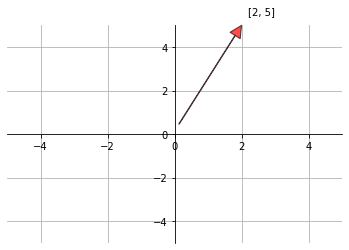

In [ ]:
fix, ax = plt.subplots()
for spine in ['left', 'bottom']:
  ax.spines[spine].set_position('zero')

for spine in ['right', 'top']:
  ax.spines[spine].set_color('none')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.grid()
vector = [2,5]
ax.annotate(" ", xy = vector, xytext=[0,0],color='red',
            arrowprops=dict(facecolor = 'red',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))
ax.text(1.1*vector[0], 1.1*vector[1], vector)

## Combinaciones lineales

Cuando trabajamos vectores, nos podemos encontrar con dos operaciones fundamentales, la suma y la multiplicación por escalares. Cuando sumamos dos vectores v y w, sumamos elemento por elemento, del siguiente modo:
\begin{equation}
v+w = \begin{bmatrix} v_1 \\ v_2 \\ . \\ .\\ . \\ v_n  \end{bmatrix} + 
\begin{bmatrix} w_1 \\ w_2 \\ . \\ . \\ . \\ w_n \end{bmatrix} =
\begin{bmatrix} v_1 + w_1 \\ v_2 + w_2 \\ . \\ . \\ . \\ v_n + w_n \end{bmatrix}
\end{equation}

En el siguiente código podemos ejemplificar lo dicho anteriormente.

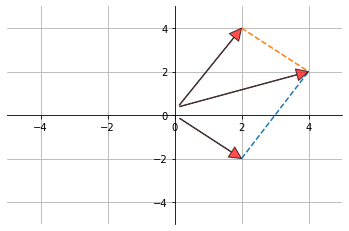

In [ ]:
fix, ax = plt.subplots()
for spine in ['left', 'bottom']:
  ax.spines[spine].set_position('zero')

for spine in ['right', 'top']:
  ax.spines[spine].set_color('none')
ax.set_xlim(-5, 5)
ax.set_ylim(-5 , 5)
ax.grid()

vectores = [[2, 4], [2, -2]]
for vector in vectores:
  ax.annotate(" ", xy = vector, xytext=[0,0],color='red',
            arrowprops=dict(facecolor = 'red',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))
  
vector = np.array([2,4]) + np.array([2, -2])
ax.annotate(" ", xy = vector, xytext=[0,0],color='red',
            arrowprops=dict(facecolor = 'red',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))

ax.plot(vectores[0], [-2,2], linestyle='--')
ax.plot(vectores[0], [4,2], linestyle='--')

## Transformaciones Lineales
una transformación lineal es una función. Por ser función, tiene su dominio y su codominio, con la particularidad de que éstos son espacios vectoriales. Tenemos dos espacios vectoriales $V$ y $W$, y una función que va de $V$ a $W$. O sea una regla de asignación que transforma vectores de $V$ en vectores de $W$. Pero no toda función que transforme vectores de $V$ en vectores de $W$ es una transformación lineal. Debe cumplir ciertas condiciones:

$$F: V \rightarrow W$$ es una transformación lienal si y sólo si:
1. $$F(u+v)=F(u)+F(v)$$ $$\forall u,v \in V$$

2. $$F(k \cdot v)= k \cdot F(v)$$ $$\forall v \in V, \forall k \in \mathbb R$$


In [ ]:
A = np.array([[-1,3],[2, -2]])
print('Matriz:\n', A, '\n')
vector = np.array([[2], [1]])
print('Vector: \n', vector, '\n')
print(vector.flatten())

Matriz:
 [[-1  3]
 [ 2 -2]] 

Vector: 
 [[2]
 [1]] 

[2 1]


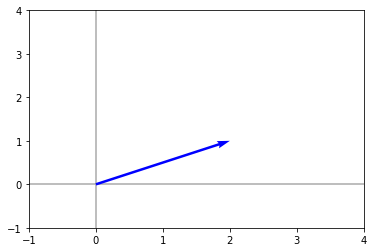

In [ ]:
alpha = 1
cols = ['blue']
vecs = [vector.flatten()]
plt.axvline(x=0, color='#A9A9A9', zorder=0)
plt.axhline(y=0, color='#A9A9A9', zorder=0)
plt.ylim(-1, 4)
plt.xlim(-1, 4)
for i in range(len(vecs)):
  if (isinstance(alpha, list)):
    alpha_i = alpha[i]
  else:
    alpha_i = alpha
  x = np.concatenate([[0,0],vecs[i]])
  plt.quiver([x[0]],
             [x[1]],
             [x[2]],
             [x[3]],
             angles='xy', scale_units='xy', scale=1, color=cols[i],
             alpha=alpha_i)


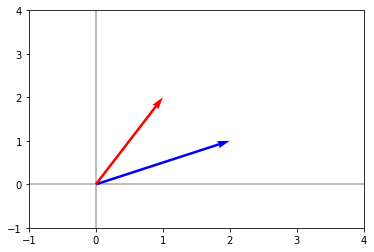

In [ ]:
A.dot(vector)
vector_transformado = A.dot(vector)
vecs = [vector.flatten(), vector_transformado.flatten()]
cols = ['blue', 'red']
plt.axvline(x=0, color='#A9A9A9', zorder=0)
plt.axhline(y=0, color='#A9A9A9', zorder=0)
plt.ylim(-1, 4)
plt.xlim(-1, 4)
for i in range(len(vecs)):
  if (isinstance(alpha, list)):
    alpha_i = alpha[i]
  else:
    alpha_i = alpha
  x = np.concatenate([[0,0],vecs[i]])
  plt.quiver([x[0]],
             [x[1]],
             [x[2]],
             [x[3]],
             angles='xy', scale_units='xy', scale=1, color=cols[i],
             alpha=alpha_i)

## Espacios y Subespacios
De acuerdo con las propiedades vistas inicialmente, se puede afirmar que $\mathbb R^3$ es un espacio vectorial, por lo que podemos definir un subespacio vectorial de la siguiente manera:\
Sea $V$ un espacio vectorial y $W$ un subconjunto no vacío de $V$.\
$W$ es un subespacio de $V$ si $W$ es en sí mismo un espacio vectorial con las mismas operaciones (suma de vectores y producto por un escalar) definidas en $V$, es decir:\
i) $$\forall u,v \in W, u+v \in W$$
ii) $$\forall u \in U, \forall k \in K, ku \in U $$


Para mayor aprendizaje, se recomienda al lector visitar las diversas fuentes de donde se obtuvo la información anterior:
- https://www.educaplus.org/movi/1_4sumavector.html \
- http://euclides.us.es/da/apuntes/alige/alige-I-4.pdf
- https://sites.google.com/site/sistemasalgebralineal/unidad-4---espacios-vectoriales/definicion-de-espacio-vectorial